In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

from scipy.io import wavfile
from scipy.fftpack import fft

class DataSet :
    global amptitude
    def getData(self, wav_file) :                             #파일 명 입력받는다.
        self.wav_file = wav_file                              #입력받아서 전역으로 만든다. 생성자에 추가할지 말지 고민중
        
        label = int(self.wav_file[-5:-4])                     #파일 이름 중에서 뒤에서 5번째를 int로 저장 ex) audio3.wav 에서는 3임
        samplingFreq, mySound = wavfile.read(self.wav_file)   #wavfile.read로 읽음 
            
        mySoundDT = mySound.dtype
        mySound = mySound / (2.**15)
        
        mySoundShape = mySound.shape
        samplePoints = float(mySound.shape[0])
        
        singalDuration = round(mySound.shape[0]/ samplingFreq, 3)
        self.mySoundOneChannel = mySound[:, 0]                #스테레오 오디오타입이기 때문에 하나만 쓴다.
        
        amptitude = self.mySoundOneChannel
        timeArray = np.arange(0,samplePoints, 1)           
        timeArray = timeArray / samplingFreq
        timeArray = timeArray * 1000
        plt.plot(timeArray, self.mySoundOneChannel, color='G')#플롯으로 보여줌 , 여기서 self.mySoundOneChannel이 우리가 데이터로 쓸 값
        plt.xlabel('Time (ms)')
        plt.ylabel('Amplitude')
        plt.show()
    def saveCsv(self):                                        #데이터 저장하는 함수
        filename = self.wav_file.replace(".wav", ".csv")  
        np.savetxt(("./csv/"+filename), np.transpose(self.mySoundOneChannel*10000))


/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


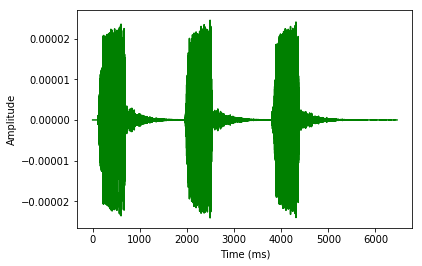

AttributeError: type object 'DataSet' has no attribute 'amptitude'

In [51]:
a = DataSet()
for i in range(4):
    filename = "audio" + str(i+1) +".wav"
    a.getData(filename)
    print(DataSet.amptitude)